# DGA\-Detection 

## 1\. Preparations

In [1]:
from utils import txt2csv
import os 


data_path = './data/'
# dga-domain.txt 
txt_path = os.path.join(data_path, "dga-domain.txt")
csv_path = os.path.join(data_path, "dga-domain.csv")
if txt2csv(txt_path, csv_path):
    print("done")

done


## 2\. Build Datasets

- Posistive samples: dga\-domain\.txt (provided by **netlab 360**)
- Negative samples: umbrella\-top\-1m\.csv

### 2\.1 Data Source

In [2]:
import os 
import pandas as pd 

In [3]:
# legit 
data_path = "./data"
umbrella_top_1m = os.path.join(data_path, "umbrella-top-1m.csv")
umbrella = pd.read_csv(umbrella_top_1m, header=None, names=['index', 'domain'])
umbrella.drop(['index'], axis=1, inplace=True)
umbrella['label'] = 'legit'
umbrella.shape

(1000000, 2)

In [4]:
umbrella.head()

,domain,label
0,google.com,legit
1,microsoft.com,legit
2,www.google.com,legit
3,data.microsoft.com,legit
4,facebook.com,legit


In [5]:
# DGA
data_path = './data'
lab_360 = os.path.join(data_path, 'dga-domain.csv')
dga = pd.read_csv(lab_360, header=None, names=['index', 'domain', 'label'])
# only one record 
dga.drop(dga.index[dga['label'].isin(['mirai', 'xshellghost', 'ccleaner', 'madmax'])], axis=0, inplace=True)
dga.drop(["index"], axis=1, inplace=True)
dga.shape 

(1324294, 2)

In [6]:
dga.head()

,domain,label
0,jkybwgxpfr.com,nymaim
1,scxjfe.com,nymaim
2,xmkrwnrrtes.com,nymaim
3,cagqhss.net,nymaim
4,vljdew.com,nymaim


In [7]:
frames = [umbrella, dga]
data = pd.concat(frames)
data.shape

(2324294, 2)

### 2\.2 Dataset Division 

In [8]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

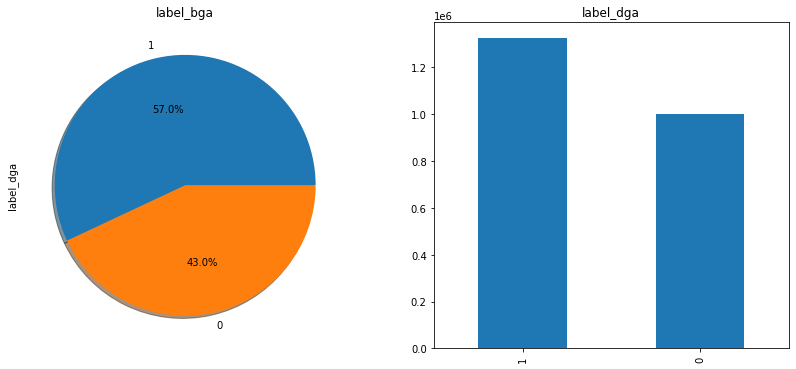

In [9]:
# positive VS negative 
data['label_dga'] = data['label'].map(lambda x: 1 if not x=='legit' else 0)

f, ax = plt.subplots(1, 2, figsize=(14,6))
data['label_dga'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('label_bga')
data['label_dga'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('label_dga')
plt.show()

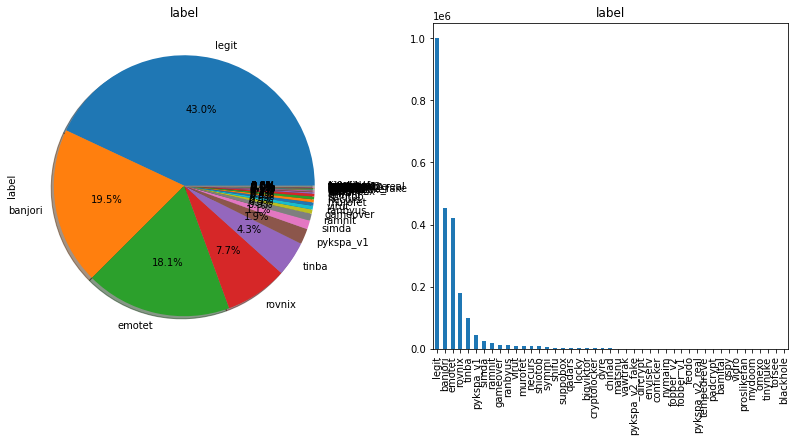

In [10]:
# percentage of each category in DGA
f, ax = plt.subplots(1, 2, figsize=(14,6))
data['label'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('label')
data['label'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('label')
plt.show()

In [11]:
data_statis = pd.DataFrame()
label_counts = data["label"].value_counts()
data_statis['family'] = label_counts.index
data_statis["number"] = label_counts.values
data_statis['ratio'] = label_counts.values / np.sum(data_statis["number"])
data_statis

,family,number,ratio
0,legit,1000000,4.302382e-01
1,banjori,452404,1.946415e-01
2,emotet,420860,1.810700e-01
3,rovnix,180000,7.744287e-02
4,tinba,100680,4.331638e-02
5,pykspa_v1,44675,1.922089e-02
6,simda,25328,1.089707e-02
7,ramnit,20079,8.638752e-03
8,gameover,12000,5.162858e-03
9,ranbyus,10839,4.663352e-03


### 2\.3 Feature Selection

In [12]:
from utils import *
import os 

In [13]:
data_path = "./data/"
corpus = os.path.join(data_path, 'corpus.txt')

In [14]:
ng = NGrams(corpus)

def get_n_gram_score(domain):
    return log10(ng.get_domain_score(domain))


def get_feats(domain):
    return [
        domain_length(domain), 
        domain_entropy(domain),
        conso_percent(domain),
        vowels_persent(domain),
        digits_persent(domain), 
        get_n_gram_score(domain), 
    ]

In [15]:
tmp_data = data.sample(n=40000, random_state=0)
tmp_domain = tmp_data["domain"].tolist()
tmp_label = tmp_data["label_dga"].tolist()
X = [get_feats(i) for i in tmp_domain]

In [16]:
from sklearn.model_selection import train_test_split


X = np.array(X)
y = np.array(tmp_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
y_train

array([0, 1, 1, ..., 1, 1, 1])

## 3\. Training & Testing 

Use SVM.

In [18]:
# normalization 
from sklearn.preprocessing import StandardScaler


transfer=StandardScaler()

X_train=transfer.fit_transform(X_train)
X_test=transfer.transform(X_test)

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [20]:
clf = SVC(C=0.5)
param_grid={
    'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}
clf = GridSearchCV(clf, param_grid=param_grid, cv=2)
clf.fit(X_train, y_train)

print('best params: \n', clf.best_params_)
print('best score: \n', clf.best_score_)

best params: 
 {'C': 1.0}
best score: 
 0.9364666666666667


In [21]:
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score, recall_score

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Callback: ', recall_score(y_test,y_pred))

Accuracy:  0.9415
Callback:  0.9481390015875816
